/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


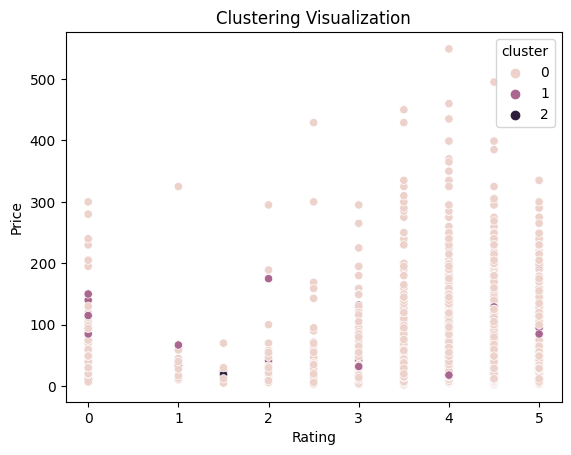

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Preprocessing
columns_to_drop = ['id', 'name', 'URL', 'MarketingFlags', 'options', 'details', 'how_to_use', 'ingredients', 'size']
train_data = train_data.drop(columns=columns_to_drop)
test_data = test_data.drop(columns=columns_to_drop)

# Convert categorical variables to numerical using one-hot encoding
train_data = pd.get_dummies(train_data, columns=['brand', 'category'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['brand', 'category'], drop_first=True)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data.drop(columns=['exclusive']))

# Model training (K-Means clustering)
num_clusters = 3  # You can adjust this number
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
train_data['cluster'] = kmeans.fit_predict(X_train)

# Visualize clustering
sns.scatterplot(data=train_data, x='rating', y='price', hue='cluster')
plt.title('Clustering Visualization')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()
#sns.pairplot(train_data, hue='cluster', diag_kind='kde')
#plt.suptitle('Pair Plot of Clusters')
#plt.show()